In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/users/PCS0268/luchinsky/CS4170_FA2022_Final_Luchinsky/analysis'

## Debug Compare

In [4]:
inA = np.loadtxt("../Default/in_hA.txt")
in_ev = np.sort(np.linalg.eig(inA)[0])
outA = np.loadtxt("../Default/out_hA.txt")
out_ev = np.sort(np.linalg.eig(outA)[0])
n = outA.shape[0]
print("n=", n)

n= 30


In [5]:
# comparing eigenvalues
c_ev = np.loadtxt("../Default/ev_out.txt")[:,1]
in_ev/c_ev

array([0.99999856, 0.99999886, 1.00000071, 1.00000106, 0.9999992 ,
       1.00000152, 0.99999836, 0.99999778, 1.00000287, 0.99999906,
       1.00000095, 1.00000124, 1.00000181, 0.99999565, 1.0000052 ,
       0.99999411, 0.99999258, 0.99999929, 1.0000002 , 1.00000003,
       1.00000015, 1.00000116, 1.00000216, 1.00000084, 0.99999762,
       1.0000003 , 1.0000013 , 1.0000011 , 0.99999963, 1.62918726])

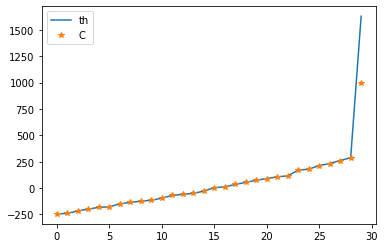

In [6]:
plt.plot(in_ev, label = "th")
plt.plot(c_ev, "*", label = "C")
plt.legend()

## Time Statistics

In [9]:
res  = pd.read_csv("../Default/results.csv", sep=" ")
res["time"] = res["tdTime"] + res["evTime"]
res

,N,p,tdTime,evTime,time
0,10,1,0.002079,0.002397,0.004476
1,10,2,0.001275,0.001454,0.002729
2,10,3,0.002071,0.002393,0.004464
3,10,4,0.001729,0.001533,0.003262
4,10,5,0.002188,0.001255,0.003443
...,...,...,...,...,...
65,100,3,76.915924,0.111900,77.027824
66,100,4,54.550441,0.077464,54.627905
67,100,5,43.862931,0.068595,43.931526
68,100,10,25.347805,0.076581,25.424386


In [10]:
res["N"].unique()

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

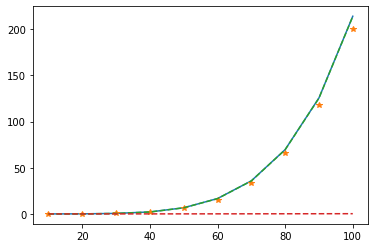

In [16]:
df1 = res.query("p==1")
Nlist = df1["N"].unique()
plt.plot(Nlist, df1["time"])
plt.plot(Nlist, 200*(Nlist/100)**5, "*")
plt.plot(Nlist, df1["tdTime"], "--")
plt.plot(Nlist, df1["evTime"], "--")
# plt.yscale("log")
# plt.xscale("log")

In [17]:
def getStat(res, N):
    df = res.query("N=="+str(N))
    time = df["time"]
    serial = float(df.query("p==1")["time"])
    speedup = serial/df["time"]
    eff = speedup/df["p"]
    KF  = (1/speedup - 1/df["p"])/(1-1/df["p"])
    return df["p"], time, speedup, eff, KF

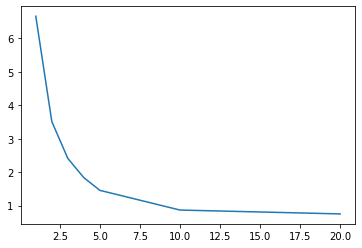

In [18]:
p, time, speedup, eff, KF  = getStat(res, N=50)
plt.plot(p, time)

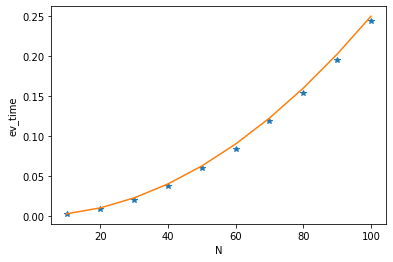

In [27]:
# N dependence of the ev time
plt.plot(Nlist, df1["evTime"], "*")
plt.plot(Nlist, (Nlist/100)**2*0.25)
plt.xlabel("N")
plt.ylabel("ev_time")
plt.show()

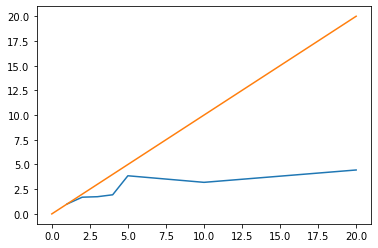

In [39]:
# p-dependence of the evTime
dff = res.query("N==50")
serial = float(dff.query("p==1")["evTime"])
pList = dff["p"]
speedup = serial/dff["evTime"]
plt.plot(pList, speedup)
plt.plot([0,20], [0,20])

(0.0, 1.0)

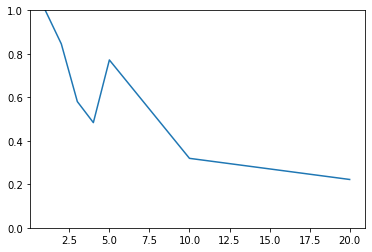

In [42]:
eff = speedup/pList
plt.plot(pList, eff)
plt.ylim(0,1)

(0.0, 1.0)

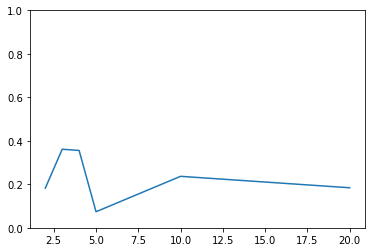

In [44]:
KF = (1/speedup - 1/pList)/(1-1/pList)
plt.plot(pList, KF)
plt.ylim(0,1)